# SAMPLED FLAIR TRIALS

running flair models on a sample of the data, generating word clouds for a quick analysis.

THIS IS NOT MEANT TO BE A WRITE UP

In [1]:
!pip install flair

     |████████████████████████████████| 337kB 2.8MB/s 
     |████████████████████████████████| 675kB 8.9MB/s 
     |████████████████████████████████| 983kB 12.7MB/s 
     |████████████████████████████████| 798kB 21.8MB/s 
     |████████████████████████████████| 256kB 22.6MB/s 
     |████████████████████████████████| 3.8MB 24.5MB/s 
     |████████████████████████████████| 1.1MB 37.6MB/s 
     |████████████████████████████████| 890kB 42.0MB/s 
  Created wheel for segtok: filename=segtok-1.5.10-cp36-none-any.whl size=25020 sha256=ee37efe77579680a76f1979d54d1f83648512dfdfa7166825c28b34b86b8066f
  Stored in directory: /root/.cache/pip/wheels/b4/39/f6/9ca1c5cabde964d728023b5751c3a206a5c8cc40252321fb6b
  Created wheel for sqlitedict: filename=sqlitedict-1.6.0-cp36-none-any.whl size=14689 sha256=233fe702da62cdf41b202b2bca2fd27f031a6453d3560b2246a0c24e8695f7dc
  Stored in directory: /root/.cache/pip/wheels/bd/57/d3/907c3ee02d35e66f674ad0106e61f06eeeb98f6ee66a6cc3fe
  Created wheel for langdetec

Loading data to be processed to flair

In [4]:
import pandas as pd
import json
from flair.data import Sentence
from flair.models import TextClassifier
from flair.models import SequenceTagger

df = pd.read_csv('tweets.csv')

count = 0

# load tagger
pos_tagger = SequenceTagger.load('pos')
ner_tagger = SequenceTagger.load('ner')
# load classifier
classifier = TextClassifier.load('sentiment')

print("loaded")

def get_sentiment(sentence):
    # function to return sentiment string
    classifier.predict(sentence)
    # string of POSITIVE / NEGATIVE
    return sentence.to_dict()['labels'][0]['value']

def get_pos(sentence):
    # funtion to return all pos in a list
    pos_tagger.predict(sentence)
    # tuple of (token, pos tag)
    pos = [(str(pos['text']), str(pos['labels'][0]).split()[0]) for pos in sentence.to_dict(tag_type='pos')['entities']]
    return pos

def get_ner(sentence):
    # function to return all named entity recognitions in a list
    ner_tagger.predict(sentence)
    ner = [str(ner['text']) for ner in sentence.to_dict(tag_type='ner')['entities']]
    return ner

def run_stack(text):
    # function to run whole stack and return a tuple
    sentence = Sentence(text)

    sent = get_sentiment(sentence)
    ner = get_ner(sentence)
    pos = get_pos(sentence)

    if len(pos) is 0:
        pos = None

    if len(ner) is 0:
        ner = None

    global count
    count = count + 1

    if count % 1000 == 0:
        print("Completed {0} tweets.".format(count))

    return {"text":text, "sent":sent, "ner":ner, "pos":pos}

def dump_tweet(W_FILENAME, TWEET):
    ## function to dump a single tweet
    # W_FILENAME @ pass in write filename, and tweet to write
    # TWEET @ function will append tweet to end of file
    with open(W_FILENAME, 'a') as fout:
        fout.write(json.dumps(TWEET)) # write tweet as string
        fout.write('\n') # write new line at end

        # closing file
        fout.close()

for text in df['text']:

    tweet = run_stack(text)
    dump_tweet('testing.json', tweet)


2020-06-12 18:43:29,294 loading file /root/.flair/models/en-pos-ontonotes-v0.5.pt
2020-06-12 18:43:29,654 loading file /root/.flair/models/en-ner-conll03-v0.4.pt
2020-06-12 18:43:31,187 loading file /root/.flair/models/sentiment-en-mix-distillbert.pt
loaded
Completed 1000 tweets.
Completed 2000 tweets.
Completed 3000 tweets.
Completed 4000 tweets.
Completed 5000 tweets.
Completed 6000 tweets.
Completed 7000 tweets.
Completed 8000 tweets.


KeyboardInterrupt: ignored

testing data processed, loading in functions to create wordclouds

In [41]:
import json
import pandas as pd
import wordcloud as wc
import matplotlib.pyplot as plt

FIN = 'testing.json'


def clean_line(LINE):
    ## function used to take line from json file, and clean it
    # LINE @ pass in line from json file to be processed

    LINE = json.loads(LINE.rstrip()) # strip newline from end
    json.dumps(LINE) # get in json format

    return LINE

def get_nested_string(data):
    word_list = [words.lower() for nest in data if nest is not None for words in nest]

    string = ""

    for word in word_list:
        string = string + " " + word
    
    return string

def get_string(data):
    word_list = [word for word in data]

    string = ""

    for word in word_list:
      string = string + " " + word 

    return string

def get_pos_string(data, POS):
  word_list = [word for pos_list in data for (word,tag) in pos_list if POS in tag]
  
  string = ""

  for word in word_list:
    string = string + " " + word

  return string

def create_wordcloud(STRING, FOUT):
    wordcloud = wc.WordCloud(
    width = 800, height = 800,
    background_color = "black",
    min_font_size = 10
    ).generate(STRING)

    # plot the WordCloud image                        
    plt.figure(figsize = (8, 8), facecolor = None) 
    plt.imshow(wordcloud) 
    plt.axis("off") 
    plt.tight_layout(pad = 0) 
    
    plt.show()


with open(FIN) as fin:

        data = [clean_line(line) for line in fin] # make list of dictionaries

        df = pd.DataFrame(data) # dump list of dictionaries to df

print(df.head())

                                                text  ...                                                pos
0  That's the point..of doing what you love to do...  ...  [[That's, VBZ], [the, DT], [point..of, NN], [d...
1  #Coronavirus Wuhan citizen journalist Chen Qiu...  ...  [[#Coronavirus, NNP], [Wuhan, NNP], [citizen, ...
2  Molt bona Informació, clau per entendre on est...  ...  [[Molt, NNP], [bona, FW], [Informació,, FW], [...
3  Yes,\nUgandan Govt shud send them food supplie...  ...  [[Yes,\nUgandan, NNP], [Govt, NNP], [shud, NN]...
4  Update - Sources on the cruise told me the Cap...  ...  [[Update, NN], [-, HYPH], [Sources, NNS], [on,...

[5 rows x 4 columns]


# Creating wordclouds for base text

1) all text

2) positive sentiment texts

3) negative sentiment texts

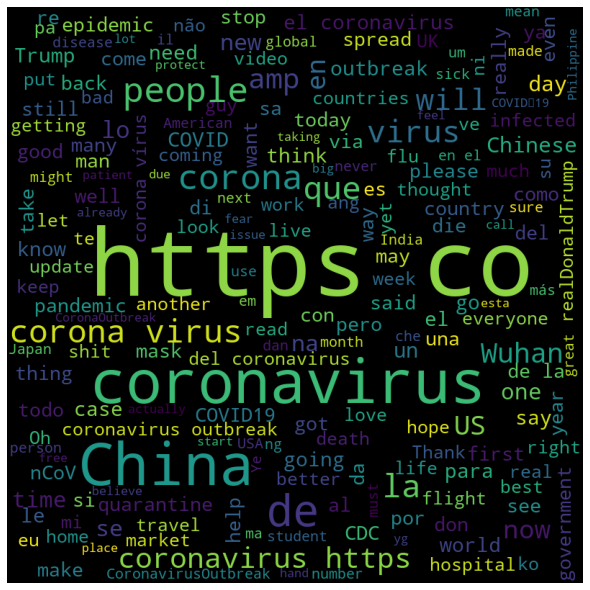

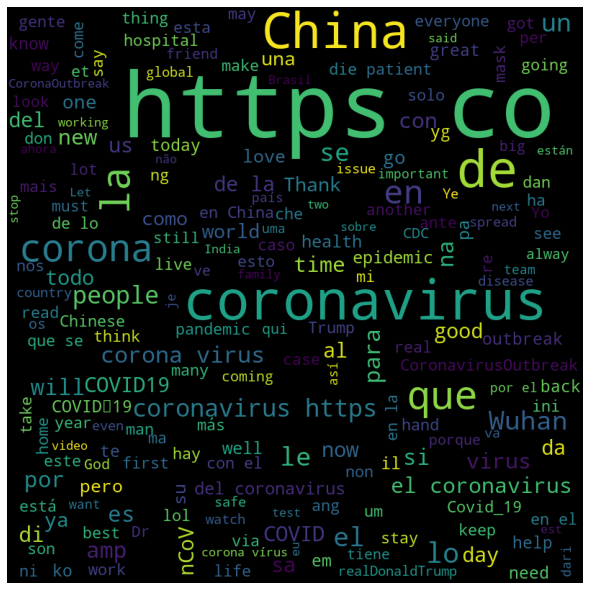

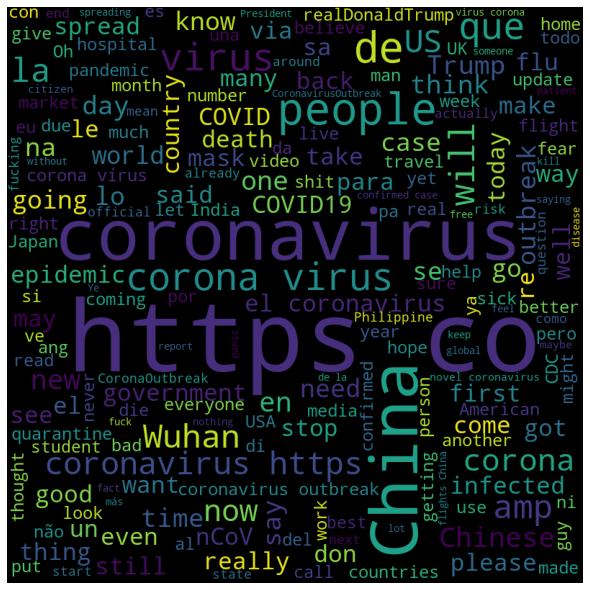

In [43]:
# getting wordcloud for all text
FOUT = 'viz/text/all_wordcloud.png'
pos_tweet = get_string(df['text'])
create_wordcloud(pos_tweet, FOUT)

# getting wordcloud for positive sentiment text
FOUT = 'viz/text/positive_wordcloud.png'
pos_tweet = get_string(df[df['sent'] == 'POSITIVE']['text'])
create_wordcloud(pos_tweet, FOUT)

# getting wordcloud for negative sentiment text
FOUT = 'viz/text/negative_wordcloud.png'
neg_tweet = get_string(df[df['sent'] == 'NEGATIVE']['text'])
create_wordcloud(neg_tweet, FOUT)

# Creating wordclouds for named entity recognition

1) all named entity recognition

2) positive sentiment named entity recognition

3) negative sentiment named entity recognition

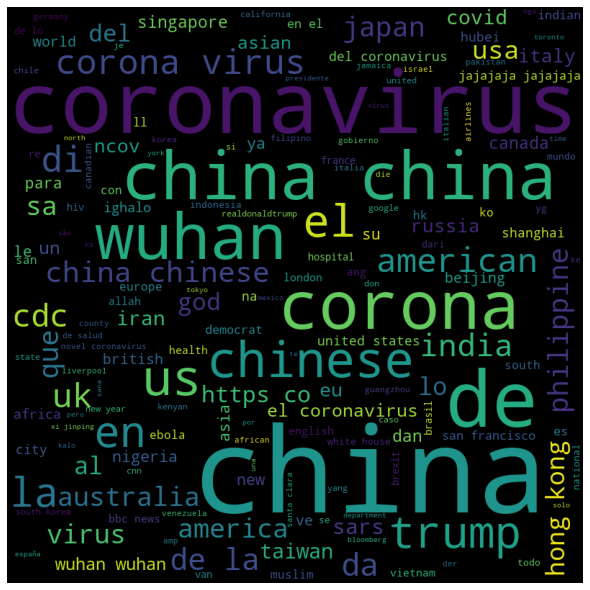

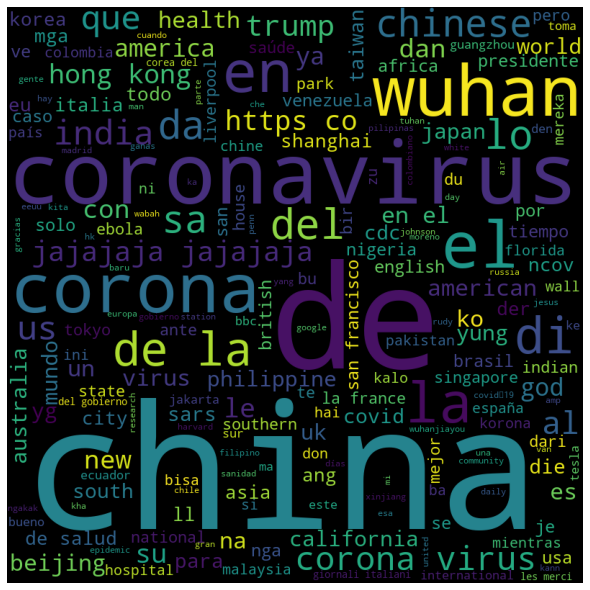

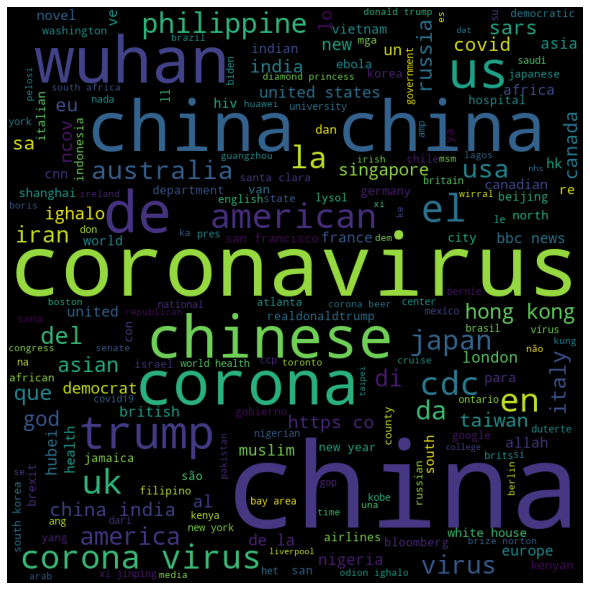

In [44]:
# getting wordcloud for named entity recognition
ner_string = get_nested_string(df['ner'])
FOUT = 'viz/ner/ner_all_wordcloud.png'
create_wordcloud(ner_string, FOUT)

# getting wordcloud for positive sentiment NER
FOUT = 'viz/ner/ner_positive_wordcloud.png'
pos_tweet = get_nested_string(df[df['sent'] == 'POSITIVE']['ner'])
create_wordcloud(pos_tweet, FOUT)

# getting wordcloud for negative sentiment NER
FOUT = 'viz/ner/ner_negative_wordcloud.png'
neg_tweet = get_nested_string(df[df['sent'] == 'NEGATIVE']['ner'])
create_wordcloud(neg_tweet, FOUT)

# Creating word clouds for verbs

1) all verbs

2) positive sentiment verbs

3) negative sentiment verbs

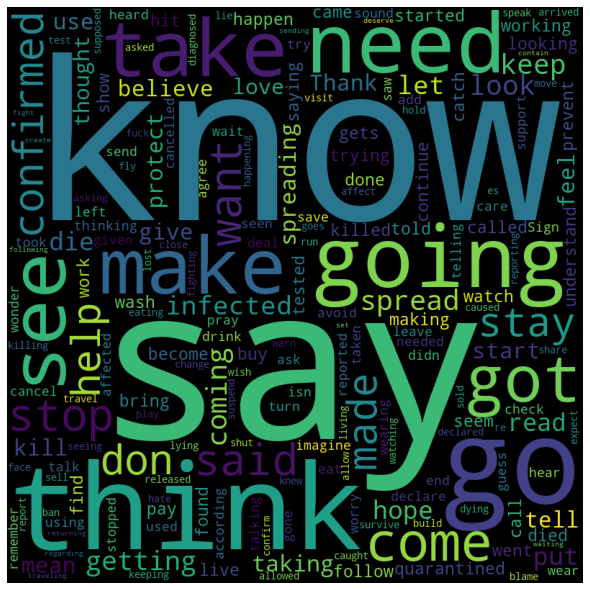

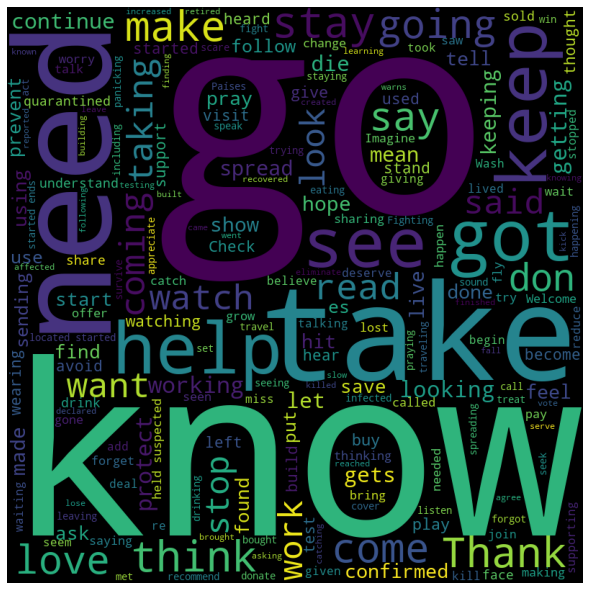

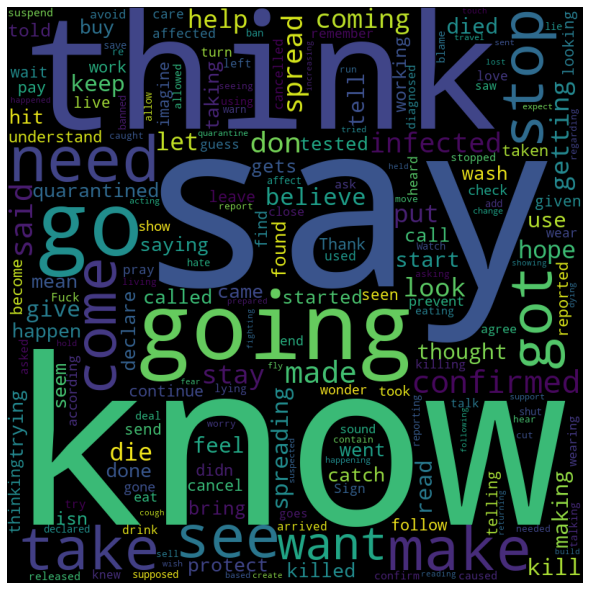

In [45]:
# getting wordclous for verbs only
FOUT = 'viz/pos/verb_all_wordcloud.png'
pos_text = get_pos_string(df['pos'], 'V')
create_wordcloud(pos_text, FOUT)

# getting wordclous for positive sentiment verbs only
FOUT = 'viz/pos/verb_positive_wordcloud.png'
pos_text = get_pos_string(df[df['sent'] == 'POSITIVE']['pos'], 'V')
create_wordcloud(pos_text, FOUT)

# getting wordclous for negative sentiment verbs only
FOUT = 'viz/pos/verb_negative_wordcloud.png'
pos_text = get_pos_string(df[df['sent'] == 'NEGATIVE']['pos'], 'V')
create_wordcloud(pos_text, FOUT)

# # getting wordclous for N tags only
# FOUT = 'viz/pos/verb_all_wordcloud.png'
# pos_text = get_pos_string(df['pos'], 'N')
# create_wordcloud(pos_text, FOUT)

Code for dumping word counts to text file

In [0]:
def count_words(data):
  word_list = [words.lower() for nest in data if nest is not None for words in nest]
  
  words_dict = {}

  for word in word_list:
    if word not in words_dict.keys():
      words_dict[word] = 1
    else:
      words_dict[word] = words_dict[word] + 1

  words_dict = {word: count for word, count in sorted(words_dict.items(), key=lambda item: item[1], reverse= True)}

  return words_dict

def dump_words(dict, FOUT):
  with open(FOUT, 'a') as fout:
    for word in dict:
      fout.write(str(word) + " " + str(dict[word]))
      fout.write('\n')

    fout.close()

  

ner_dict = count_words(df['ner'])

dump_words(ner_dict, 'words.txt')
